In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [20]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [34]:
data.drop(['Paved_Highways'],axis =1, inplace = True)

In [35]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [36]:
corr_matrix = data.corr()
corr_matrix

,Petrol_tax,Average_income,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.157070,-0.244862
Population_Driver_licence(%),-0.288037,0.157070,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.698965,1.000000


<AxesSubplot:>

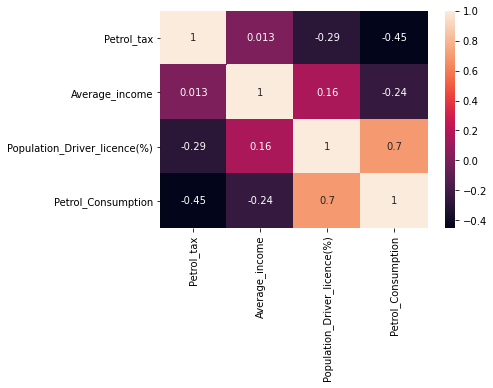

In [37]:
import seaborn as sn
sn.heatmap(corr_matrix, annot = True)

In [38]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred_train = regressor.predict(x_train)
y_pred_train

array([562.47588642, 539.69864935, 484.97999615, 622.8994458 ,
       788.43608845, 495.56250216, 498.52196601, 655.74932121,
       418.53970038, 582.53672532, 621.10899995, 719.69408278,
       654.63037172, 645.39368183, 601.42866945, 521.72262562,
       563.71014237, 605.63204604, 729.42878431, 331.57876182,
       669.25320769, 559.08420797, 467.18820425, 509.31805882,
       538.10664355, 585.88910796, 503.46836728, 588.43409743,
       708.17738129, 451.2198684 , 490.58046506, 736.7639029 ,
       553.46321306, 708.27383162, 663.99537878, 571.10285023,
       581.84095121, 570.11181535])

In [41]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([556.80179005, 705.39311005, 640.93968737, 473.75233847,
       463.19094858, 523.13278281, 566.05619273, 640.19524   ,
       531.32010304, 614.58189682])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.677161317514833

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.6158477251863773

In [44]:
from sklearn import metrics
#MAE
print("MAE=",metrics.mean_absolute_error(y_test,y_pred_test))
#MSE
print("MSE=",metrics.mean_squared_error(y_test,y_pred_test))
#RMSE
print("RMSE=",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE= 43.34343474503203
MSE= 2844.282650333803
RMSE= 53.331816491976
